<a href="https://colab.research.google.com/github/VineetaGeorge/Portfolio/blob/main/Agricultural_Production_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title: Predicting Crop Production in Indian Agriculture**

**Introduction:**
India stands as one of the world's foremost agricultural producers, boasting a rich diversity of crops and a significant contribution to the global agricultural landscape. With a vast agricultural sector that employs a substantial portion of its workforce, India's agricultural industry plays a pivotal role in the country's economy, ensuring food security for its population. In this context, leveraging machine learning techniques for predictive analysis in agriculture holds immense potential for optimizing crop production and enhancing agricultural efficiency.

**Objective:**
The aim of this project is to develop a machine learning model capable of accurately predicting crop production in India. By harnessing the power of data analytics, the objective is to provide insights into crop yield forecasts, thereby enabling informed decision-making processes for farmers, policymakers, and agricultural stakeholders.

**Dataset Description:**
The dataset utilized for this project is sourced from Kaggle, a reputable platform for datasets and machine learning competitions.




In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/India Agriculture Production - new.csv')
df


,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


In [ ]:
df.shape

(345407, 10)

In [ ]:
df.dtypes

State                object
District             object
Crop                 object
Year                 object
Season               object
Area                float64
Area Units           object
Production          float64
Production Units     object
Yield               float64
dtype: object

In [ ]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [ ]:
df.tail()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345406,Manipur,UKHRUL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


In [ ]:
df.describe()

,Area,Production,Yield
count,3.453740e+05,3.404140e+05,345374.000000
mean,1.167019e+04,9.583712e+05,79.407569
std,4.583843e+04,2.152986e+07,916.628744
min,4.000000e-03,0.000000e+00,0.000000
25%,7.400000e+01,8.700000e+01,0.546742
50%,5.320000e+02,7.170000e+02,1.000000
75%,4.110000e+03,7.176000e+03,2.467080
max,8.580100e+06,1.597800e+09,43958.333330


In [ ]:
df.isna().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

**EXPLORATORY DATA** **ANALYSIS**

In [ ]:
df=df.drop_duplicates()
df.shape

(345407, 10)

Text(0.5, 1.0, 'Count of each Season')

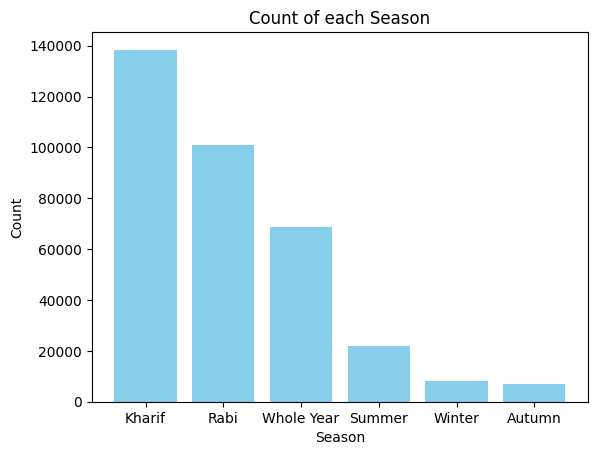

In [ ]:
import matplotlib.pyplot as plt
season_counts = df['Season'].value_counts()
plt.bar(season_counts.index, season_counts.values, color='skyblue')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of each Season')


<Axes: xlabel='Season', ylabel='Production'>

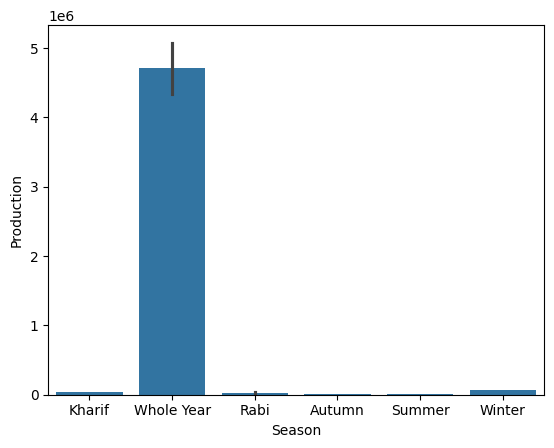

In [ ]:
import seaborn as sns
sns.barplot(x=df['Season'],y=df['Production'])

Text(0.5, 1.0, 'Top 10 States by Count')

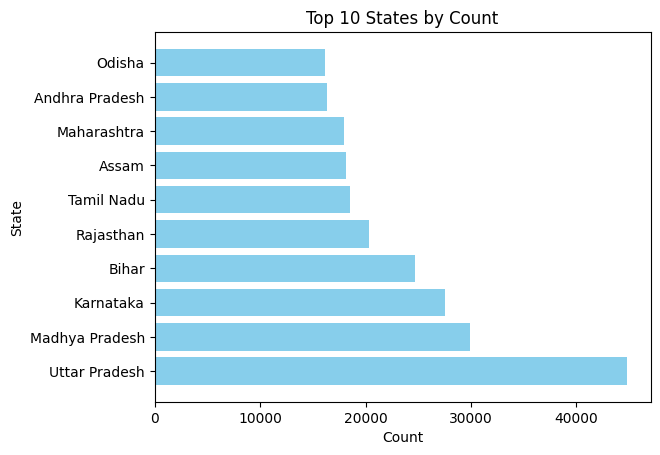

In [ ]:
state_counts = df['State'].value_counts()
# Set the number of top states to display
top_n = 10

# Select the top 10 states
top_states = state_counts.head(10)

# Plotting the horizontal bar chart
plt.barh(top_states.index, top_states.values, color='skyblue')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Top 10 States by Count')


Text(0.5, 1.0, 'Top 10 Districts by Count')

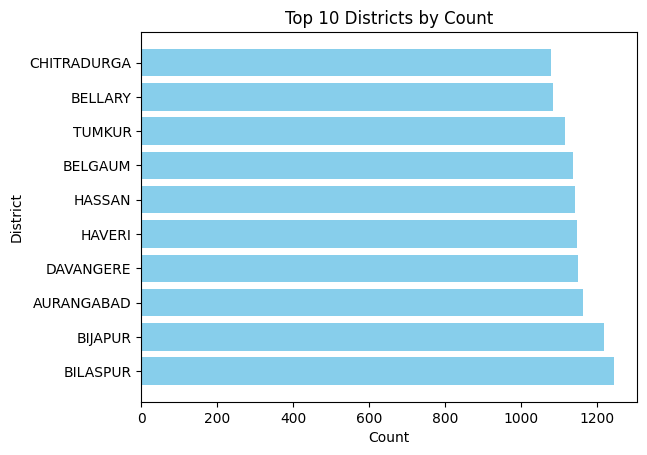

In [ ]:
districts_counts = df['District'].value_counts()

# the top 10 districts
top_districts = districts_counts.head(10)

# Plotting the horizontal bar chart
plt.barh(top_districts.index, top_districts.values, color='skyblue')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('District')
plt.title('Top 10 Districts by Count')


Text(0.5, 1.0, 'Top 10 Crops')

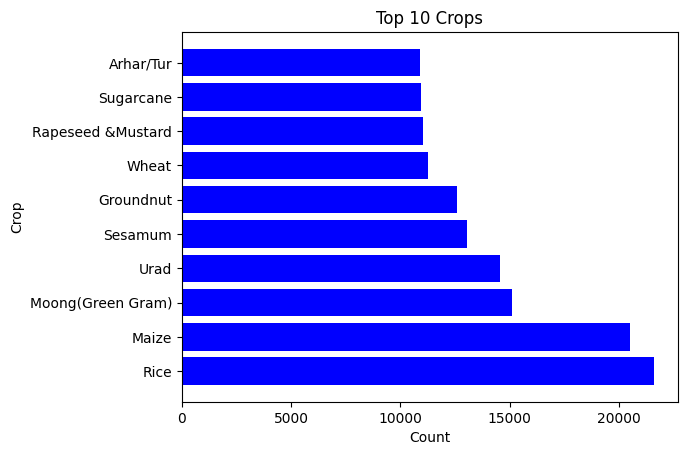

In [ ]:
crop_counts = df['Crop'].value_counts()
#top 10 crops
top_crops = crop_counts.head(10)

# Plotting the horizontal bar chart
plt.barh(top_crops.index, top_crops.values, color='blue')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Crop')
plt.title('Top 10 Crops')


Text(0.5, 1.0, 'Top 10 Years by Count')

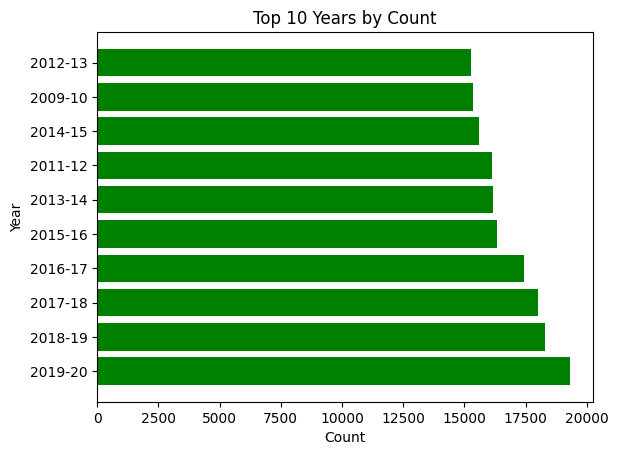

In [ ]:
df['Year'].value_counts()
top_years = df['Year'].value_counts().head(10)

# Plotting the horizontal bar chart
plt.barh(top_years.index, top_years.values, color='green')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Top 10 Years by Count')


In [ ]:
df=df.drop(['Area Units','Production Units'],axis=1)
df

,State,District,Crop,Year,Season,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,5267.0,1.696296
...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,NaN,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,NaN,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,NaN,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,NaN,NaN


In [ ]:

 #filling missing values
 df['Production']=df['Production'].fillna((df['Production']).mean())
 df['Crop']=df['Crop'].fillna((df['Crop']).mode()[0])
 df['Area']=df['Area'].fillna((df['Area']).mean())
 df['Yield']=df['Yield'].fillna((df['Yield']).mean())        #numerical===mean
 df['Season']=df['Season'].fillna((df['Season']).mode()[0])  #object===mode
 df['Year']=df['Year'].fillna((df['Year']).mode()[0])


In [ ]:
df.isna().sum()

State         0
District      0
Crop          0
Year          0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345407 entries, 0 to 345406
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345407 non-null  object 
 1   District    345407 non-null  object 
 2   Crop        345407 non-null  object 
 3   Year        345407 non-null  object 
 4   Season      345407 non-null  object 
 5   Area        345407 non-null  float64
 6   Production  345407 non-null  float64
 7   Yield       345407 non-null  float64
dtypes: float64(3), object(5)
memory usage: 23.7+ MB


**DATA PREPROCESSING**

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])
df['District'] = label_encoder.fit_transform(df['District'])
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df['Year'] = label_encoder.fit_transform(df['Year'])
df['Season'] = label_encoder.fit_transform(df['Season'])


In [ ]:
df

,State,District,Crop,Year,Season,Area,Production,Yield
0,0,481,0,4,1,1254.000000,2061.00000,1.643541
1,0,481,0,5,4,1258.000000,2083.00000,1.655803
2,0,481,0,6,4,1261.000000,1525.00000,1.209358
3,0,485,0,4,1,3100.000000,5239.00000,1.690000
4,0,627,0,5,4,3105.000000,5267.00000,1.696296
...,...,...,...,...,...,...,...,...
345402,21,269,41,22,2,11670.191258,958371.17804,79.407569
345403,21,586,41,22,2,11670.191258,958371.17804,79.407569
345404,21,647,41,22,2,11670.191258,958371.17804,79.407569
345405,21,662,41,22,2,11670.191258,958371.17804,79.407569


In [ ]:
df.dtypes

State           int64
District        int64
Crop            int64
Year            int64
Season          int64
Area          float64
Production    float64
Yield         float64
dtype: object

In [ ]:
df.corr()

,State,District,Crop,Year,Season,Area,Production,Yield
State,1.000000,-0.037775,0.009447,0.031537,-0.040313,0.037712,-0.000178,0.000882
District,-0.037775,1.000000,-0.002308,0.019817,0.000926,-0.023610,0.012218,0.007666
Crop,0.009447,-0.002308,1.000000,-0.005510,0.038615,0.058074,-0.054864,-0.107402
Year,0.031537,0.019817,-0.005510,1.000000,-0.036244,-0.024222,0.004029,0.008557
Season,-0.040313,0.000926,0.038615,-0.036244,1.000000,-0.045767,0.065277,0.128983
Area,0.037712,-0.023610,0.058074,-0.024222,-0.045767,1.000000,0.048472,0.000426
Production,-0.000178,0.012218,-0.054864,0.004029,0.065277,0.048472,1.000000,0.437376
Yield,0.000882,0.007666,-0.107402,0.008557,0.128983,0.000426,0.437376,1.000000


<Axes: >

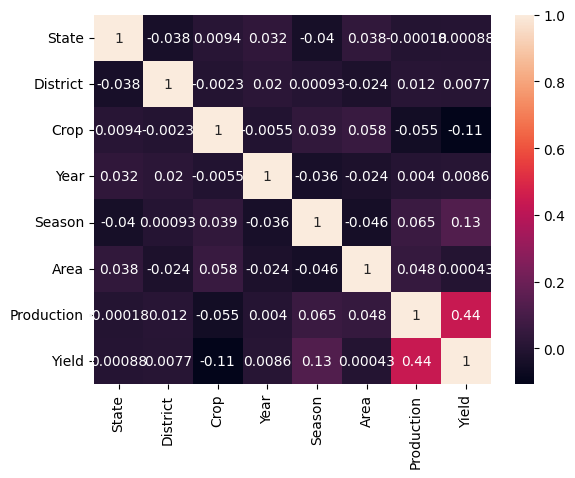

In [ ]:
 #correlation represented graphically using Heatmap()
 sns.heatmap(df.corr(),annot=True)

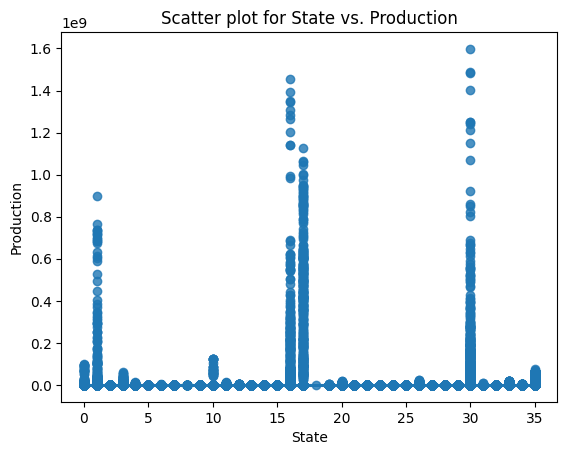

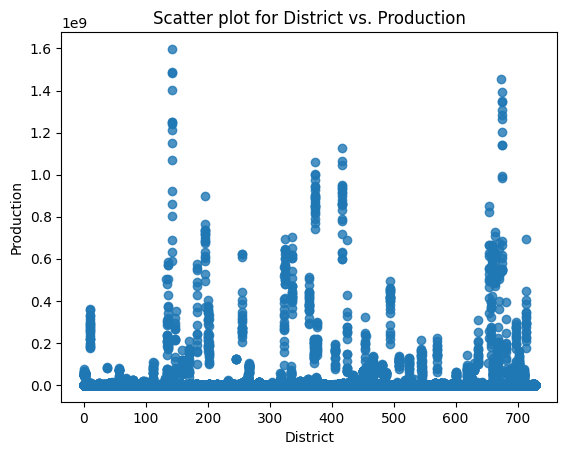

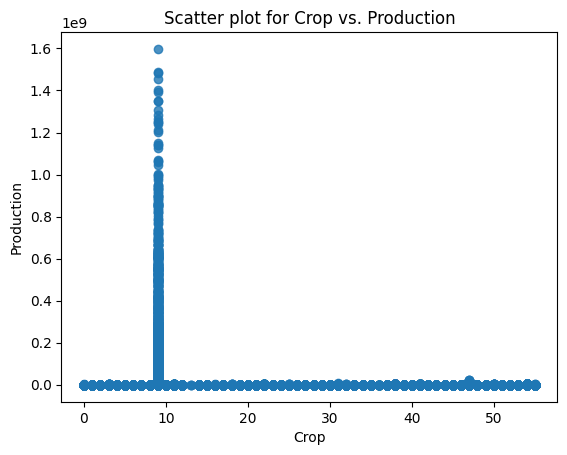

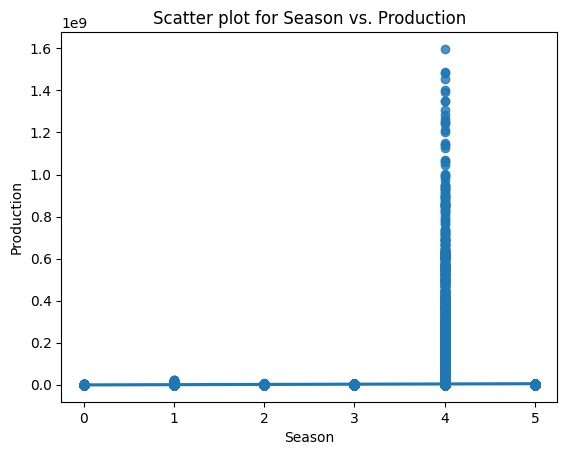

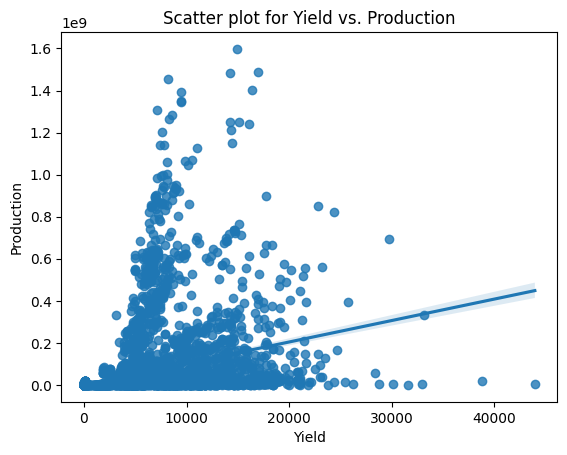

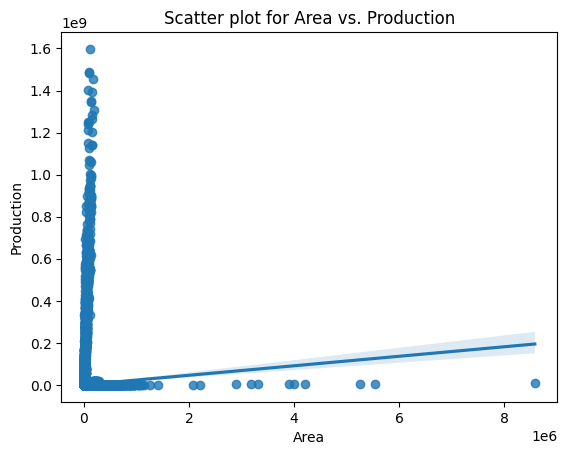

In [ ]:

x_axis = ['State', 'District', 'Crop', 'Season', 'Yield', 'Area']
y_axis = df['Production']

for i in x_axis:
    sns.regplot(x=df[i], y=y_axis)
    plt.title(f'Scatter plot for {i} vs. Production')
    plt.xlabel(i)
    plt.ylabel('Production')
    plt.show()



([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'State'),
  Text(1, 0, 'District'),
  Text(2, 0, 'Crop'),
  Text(3, 0, 'Year'),
  Text(4, 0, 'Season'),
  Text(5, 0, 'Area'),
  Text(6, 0, 'Production'),
  Text(7, 0, 'Yield')])

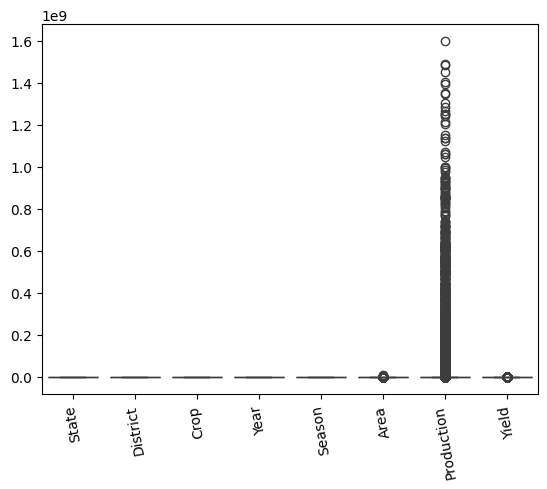

In [ ]:
#finding outliers
sns.boxplot(df)
plt.xticks(rotation=100)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'State'),
  Text(1, 0, 'District'),
  Text(2, 0, 'Crop'),
  Text(3, 0, 'Year'),
  Text(4, 0, 'Season'),
  Text(5, 0, 'Area'),
  Text(6, 0, 'Production'),
  Text(7, 0, 'Yield')])

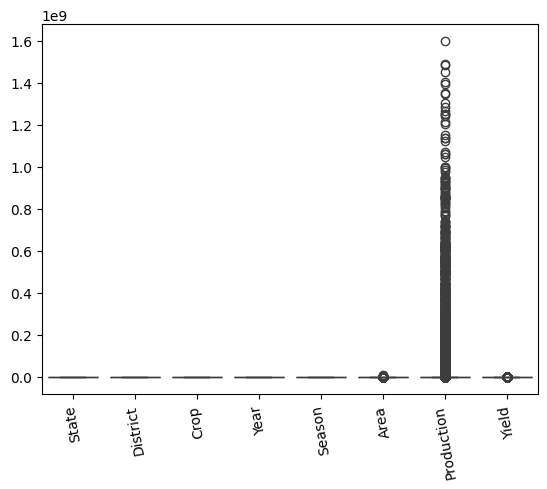

In [ ]:
 sns.boxplot(df)
 plt.xticks(rotation=100)

<Axes: ylabel='Production'>

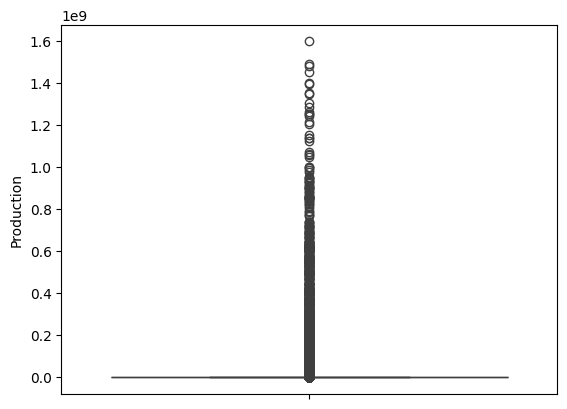

In [ ]:
sns.boxplot(df['Production'])

In [ ]:
 # Calculate the IQR(inter quartile range)
 Q1 = df['Production'].quantile(0.25)
 Q3 = df['Production'].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - (1.5 * IQR)
 upper_bound = Q3 + (1.5 * IQR)
 outlier_mask = (df['Production'] < lower_bound) | (df['Production'] > upper_bound)
 df2= df[~outlier_mask]

<Axes: ylabel='Production'>

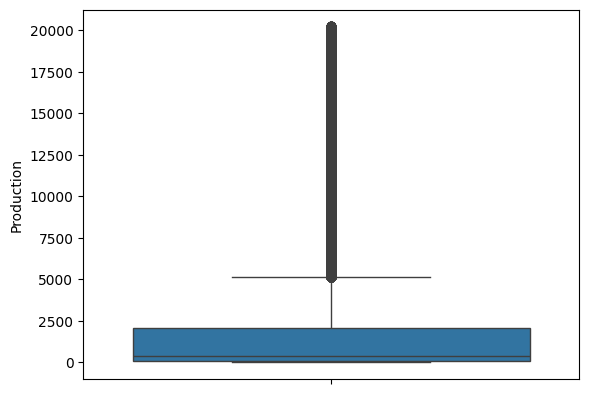

In [ ]:
 # after removing of outliers
 sns.boxplot(df2['Production'])

In [ ]:
df2.shape

(283420, 8)

**Feature selection using chi_square test**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = df2.drop(columns=['Production']).astype(int)  # Input features
y = df2['Production'].astype(int)  # Target variable (class label)

k = 5
selector = SelectKBest(chi2, k=k)
bst = selector.fit_transform(x, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = x.columns[selected_feature_indices]
print("Selected Features:", selected_features.tolist())


Selected Features: ['State', 'District', 'Crop', 'Area', 'Yield']


In [ ]:
 #convert training and testing data
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test = train_test_split(bst,y,test_size=0.30,random_state=42)


In [ ]:
bst

array([[   0,  481,    0, 1254,    1],
       [   0,  481,    0, 1258,    1],
       [   0,  481,    0, 1261,    1],
       ...,
       [  35,  531,   54, 3736,    1],
       [  35,  531,   54, 2752,    2],
       [  35,  531,   54, 2979,    2]])

In [ ]:
y_test

148391     4591
9951         36
174799     1951
40561       129
235883       36
          ...  
190423       10
285242     1620
172472      403
76280     12377
208915     1106
Name: Production, Length: 85026, dtype: int64

**Model Creation**

In [ ]:
#Model Creation

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Retrieve the default values for the parameters
model.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

**Hyperparameter Tuning**

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameter grid
parameters = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [None, 1, 5, 7, 6]
}

model = LinearRegression()

# Initialize GridSearchCV
gsv = GridSearchCV(model, parameters, cv=10, scoring='neg_mean_squared_error')

# Fit the GridSearchCV instance
gsv.fit(x_train, y_train)

# Access the best hyperparameters
print("Best hyperparameters:", gsv.best_params_)


Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


**Multiple Linear Regression Model**

In [ ]:
#Multiple Linear Regression

model1=LinearRegression(positive=True)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [ ]:
 df3=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred})
 df3

,actual_value,predicted_value,difference
148391,4591,1992.075132,2598.924868
9951,36,1594.119905,-1558.119905
174799,1951,2047.466262,-96.466262
40561,129,1565.272855,-1436.272855
235883,36,1549.396487,-1513.396487
...,...,...,...
190423,10,1637.541032,-1627.541032
285242,1620,1746.199486,-126.199486
172472,403,2235.325771,-1832.325771
76280,12377,3118.429979,9258.570021


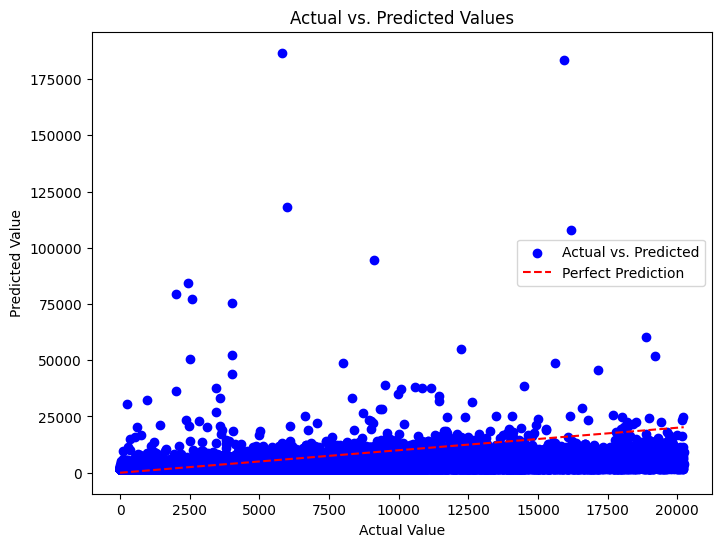

In [ ]:

plt.figure(figsize=(8, 6))

# Scatter plot for actual vs. predicted values
plt.scatter(df3['actual_value'], df3['predicted_value'], marker='o', color='blue', label='Actual vs. Predicted')

# Plotting the perfect prediction line
plt.plot([min(df3['actual_value']), max(df3['actual_value'])],
         [min(df3['actual_value']), max(df3['actual_value'])],
         linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [ ]:
 print('slpe is')
 list(zip(x,model1.coef_))

slpe is


[('State', 0.0),
 ('District', 0.20662190585144896),
 ('Crop', 0.0),
 ('Year', 0.23822819933439665),
 ('Season', 2.8536382665168345)]

In [ ]:
 print('constant is',model1.intercept_)

constant is 1506.6276641513823


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Assuming y_test and y_pred are defined earlier
r = r2_score(y_test, y_pred)
print('r2 score:', r)

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Error percentage:', mape)


r2 score: 0.18563524207780147
MAE: 2109.9434474906884
Error percentage: 4.8343128553382984e+16


In [ ]:
from sklearn.metrics import mean_squared_error


# Assuming y_test and y_pred are defined earlier
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 3507.665909795286


**Decision Tree Algorithm**

In [ ]:
 # decision tree algorithm
 from sklearn.tree import DecisionTreeRegressor
 dec=DecisionTreeRegressor()
 dec.fit(x_train,y_train)
 y_pred1=dec.predict(x_test)
 r1=r2_score(y_test,y_pred1)
 print('r2 score',r2_score(y_test,y_pred1))
 print('mean_absolute_percentage_error',mean_absolute_percentage_error(y_test,y_pred1))

r2 score 0.9029784768331787
mean_absolute_percentage_error 803562847209899.0


**Random Forest Algorithm**

In [ ]:
 #random forest regressor
 from sklearn.ensemble import RandomForestRegressor
 random=RandomForestRegressor()
 random.fit(x_train,y_train)
 y_pred2=random.predict(x_test)
 r2=r2_score(y_test,y_pred2)
 print('r2 score',r2_score(y_test,y_pred2))
 print('mean_absolute_percentage_error ',mean_absolute_percentage_error(y_pred2,y_test))

r2 score 0.9423698029409135
mean_absolute_percentage_error  0.19891965121642702


([0, 1, 2],
 [Text(0, 0, 'multiple_linear_regression'),
  Text(1, 0, 'Decision_tree_regressor'),
  Text(2, 0, 'Random_forest_regressor')])

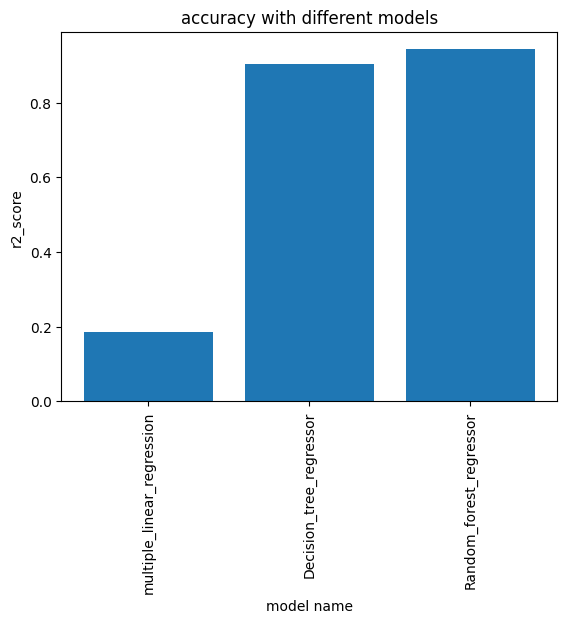

In [ ]:
 visual=['multiple_linear_regression','Decision_tree_regressor','Random_forest_regressor']
 result=[r,r1,r2]
 plt.bar(visual,result)
 plt.xlabel('model name')
 plt.ylabel('r2_score')
 plt.title('accuracy with different models')
 plt.xticks(rotation=90)

In [ ]:
import pickle

# Assuming 'random' is a trained Random Forest model
with open('random_forest.pickle', 'wb') as dump_var:
    pickle.dump(random, dump_var)

# Load the saved model
with open('random_forest.pickle', 'rb') as pickle_in:
    pickle_clf = pickle.load(pickle_in)

# Assuming x_test and y_test are defined
accuracy_pkl = pickle_clf.score(x_test, y_test)
print("Accuracy from loaded model:", accuracy_pkl)


Accuracy from loaded model: 0.9423698029409135


**Conclusion:**
Among the three models evaluated, the Random Forest Regressor emerges as the top performer, showcasing superior performance based on the R2 score and other metrics. Specifically, the Random Forest model demonstrates an impressive accuracy rate of 94%, solidifying its position as the most accurate model among the alternatives.